# Related searches

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

## Hyperparameters

In [2]:
min_word_count = 100
groupby_retailers = False

## Read file

In [3]:
df = pd.read_csv('/Users/pedrosalesdebruin/Development/datascience/data/queries_by_eng_session.csv')

In [4]:
df.head()

,eng_session_created_at_millis,retailer_id,listagg
0,1.536207e+12,67980.0,"socks, square, merimeri, baby, little sleepies..."
1,1.536216e+12,22605.0,anaya water hyacinth straw bag - black tiered ...
2,1.536238e+12,61083.0,"made in usa rugs, coffee table, rug, rugs, fur..."
3,1.536242e+12,37940.0,candy
4,1.536242e+12,20729.0,"gold lux, baguette"


In [5]:
all_queries = list( itertools.chain.from_iterable([x.split(',') for x in df['listagg']]) )

In [6]:
df['retailer_id'].value_counts().sort_values(ascending=False).head(20)

42464.0    1047
4690.0     1001
59138.0     881
55092.0     877
60833.0     824
32444.0     768
12684.0     759
78770.0     749
20532.0     723
46210.0     680
5729.0      667
80028.0     666
12929.0     639
7268.0      639
23965.0     620
10661.0     616
65167.0     616
24168.0     611
50741.0     596
12832.0     584
Name: retailer_id, dtype: int64

In [15]:
df.loc[df['retailer_id']==12832, 'listagg'].head(20)

14       candy, amped, elements , elements truffels, sc...
275      amped, elements truffels, elements , scraps of...
349      garden, food, vintage, cookie, packaged, packa...
1635     vintage, lake, charcuterie , cutting board, ga...
1966     amped, charcuterie , cutting board, elements ,...
2470     valentine, ceramic mugs, candy, amped, stems, ...
3766     elements truffels, amped, elements , scraps of...
5689     elements , packaged food, elements truffels,  ...
6063     elements , amped, elements truffels, scraps of...
6169     candy, amped, valentine, elements , elements t...
6538     candy, scraps of the past, elements truffels, ...
7230     vintage, candy, packaged food, boyds, food, va...
7394     amped, stem floral, flower, stems, ceramic mug...
8537     garden, vintage, food, cookie, packaged, packa...
14337    garden, vintage, dried, dried flowers, wreath,...
15893    garden, candy, boyds, valentine, vintage, food...
15906    boyds, elements truffels, elements , kitchen, .

In [7]:
if groupby_retailers:
    df = df.groupby('retailer_id')['listagg'].sum().reset_index()

### Let's remove queries with more than 3 words

In [8]:
all_queries = [x.strip() for x in all_queries if len(x.split()) < 4]

In [9]:
all_queries[:20]

['socks',
 'square',
 'merimeri',
 'baby',
 'little sleepies',
 'baby baazar',
 'coffee table',
 'rug',
 'rugs',
 'furniture',
 'side table',
 'bestie gift set',
 'metal hanging',
 'cactus milk bath',
 'wall hanging',
 'sconce',
 'wall light',
 'new made la',
 'plant hanger',
 'concrete planter']

In [10]:
def word_counter(query_list):
    counts = {}
    
    for x in query_list:
        if not isinstance(x, str): continue
        for w in x.split():
            if w not in counts.keys():
                counts[w]=1
            else:
                counts[w]+=1
                
    return counts

In [11]:
query_count = word_counter(all_queries)

## Remove rare queries

In [ ]:
from collections import Counter

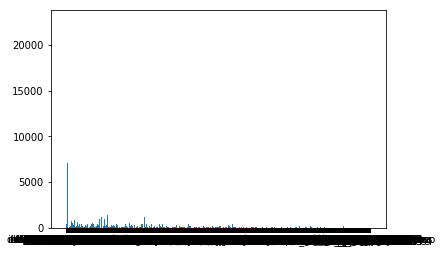

In [12]:
labels, values = zip(*Counter(all_queries).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [13]:
all_queries = [ k for k,v in query_count.items() if v > 10 ]

## Convert plural to singular

In [14]:
for w in all_queries:
    w_plus_s = w+'s'
    w_minus_s = w.rstrip('s')
    
    if w_plus_s in query_count.keys():
        if query_count[w_plus_s] > query_count[w]:
            df['listagg'].str.replace(w, w_plus_s)
        else:
            df['listagg'].str.replace(w_plus_s, w)
    elif w_minus_s in query_count.keys():
        if query_count[w_minus_s] > query_count[w]:
            df['listagg'].str.replace(w, w_minus_s)
        else:
            df['listagg'].str.replace(w_minus_s, w)
                
    else:
        continue
    

KeyboardInterrupt: 

In [ ]:
for w in all_queries:
    if w not in query_count.keys():
        print('Word {} not in query_count'.format(w))

In [ ]:
frequent_words = dict((k, v) for k, v in query_count.items() if v >= min_word_count)

In [ ]:
words_to_plot = {k:v for (k,v) in frequent_words.items() if v > 20000}

fig, ax = plt.subplots(figsize=(20,6))

plot = plt.bar(x=words_to_plot.keys(), height=words_to_plot.values())

plt.xticks(fontsize=16, rotation=75);
plt.yscale('log')
plt.ylim(5, 50000)

# Top 5 queries associated with most common queries

In [ ]:
top_words = words_to_plot

In [ ]:
for w in words_to_plot:
    w_query_corpus = df['listagg']  

## Loop over common words, find top TF-IDF words

Want to use IDF of entire query corpus, not IDF of corpus that contain query being iterated on. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
#     from sklearn.feature_extraction.text import TfidfVectorizer

#     my_data = ["hello how are you", "hello who are you", "i am not you"]

#     tf = TfidfVectorizer(use_idf=True)
#     tf.fit_transform(my_data)

#     idf = tf.idf_ 